<h1>모델 선택과 확장</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 교차검증을 통한 파라메터 튜닝

당뇨 데이터 셋

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=20)

KNN 회귀 모델

In [3]:
from sklearn.neighbors import KNeighborsRegressor
f = KNeighborsRegressor(n_neighbors=5)
f.fit(xtrain,ytrain)
print('train accuracy: ', f.score(xtrain,ytrain))
print('test accuracy: ', f.score(xtest,ytest))

train accuracy:  0.5965805996455307
test accuracy:  0.3661395930387644


In [4]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(f,xtrain,ytrain,cv=5)
print(cv_score)
print(cv_score.mean())

[0.33481701 0.24003059 0.38131323 0.51266514 0.33257977]
0.3602811485801669


파라메터에 따른 성능 변화

In [5]:
r2_train = []; r2_cv = []; r2_test = []
klist = np.arange(1,100)   # klist = [1,2,...,99]
for k in klist:
  f = KNeighborsRegressor(n_neighbors=k)
  f.fit(xtrain,ytrain)
  r2_train.append( f.score(xtrain,ytrain) )
  r2_cv.append( cross_val_score(f,xtrain,ytrain,cv=5).mean() )
  r2_test.append( f.score(xtest,ytest) )

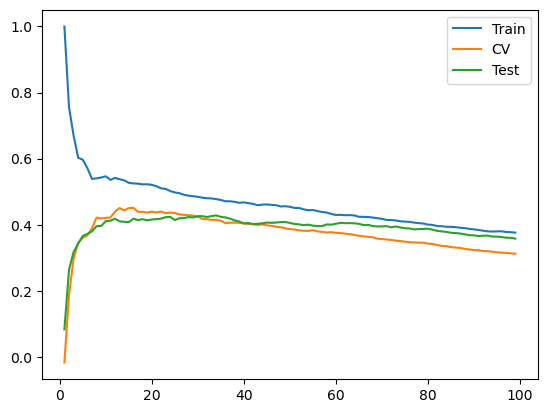

In [6]:
plt.plot(klist,r2_train,klist,r2_cv,klist,r2_test)
plt.legend(['Train','CV','Test'])

좀 더 간단한 파라메터 튜닝

In [7]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(1,100)}
f = GridSearchCV( KNeighborsRegressor(), params, cv=5 )
f.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [8]:
f.best_estimator_

KNeighborsRegressor(n_neighbors=16)

In [9]:
f.best_params_

{'n_neighbors': 16}

In [10]:
f.best_score_

0.4509426203809033

In [11]:
ytest_hat = f.predict(xtest)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.5248722701783495 0.41817012296407885


# 규제화

당뇨 데이터셋

In [12]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.7,random_state=20)

일반 선형 회귀 모델

In [13]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print( f.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  29.3676131  -293.38425092  527.43485367  448.88607497   77.33175909
 -310.64726078 -486.03956718   80.79871849  364.98295199  -22.92266212]
0.5598531643356341 0.4580560313913643


Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
f = Ridge(alpha=1)
f.fit(xtrain,ytrain)
print( f.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  32.24723372   -6.82909745  186.85946586  148.72248867    3.90112491
  -12.86005453 -100.16037739   74.62995466  146.45544525   71.4470482 ]
0.3450744227565974 0.33517157855887636


In [15]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':10**np.linspace(-5,5,21)}
f = GridSearchCV( Ridge(), params )
f.fit(xtrain,ytrain)
f.best_estimator_

Ridge(alpha=0.03162277660168379)

In [16]:
print( f.best_estimator_.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  29.16864059 -238.42564666  496.33797444  412.30365672 -102.59906309
 -157.11621398 -328.74511943  136.08573689  394.88781305    7.23527899]
0.5567564202344204 0.4741146989993217


Lasso Regression

In [17]:
from sklearn.linear_model import Lasso
f = Lasso(alpha=1)
f.fit(xtrain,ytrain)
print( f.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  0.          -0.         427.71365661 125.97200881  -0.
  -0.          -0.           0.         188.33252975   0.        ]
0.38823395515977177 0.3579916534698082


In [18]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':10**np.linspace(-5,5,21)}
f = GridSearchCV( Lasso(max_iter=10000), params )
f.fit(xtrain,ytrain)
f.best_estimator_

Lasso(alpha=0.1, max_iter=10000)

In [19]:
print( f.best_estimator_.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[   0.         -202.62863881  520.30775338  396.59511111   -0.
 -142.0240664  -414.11283805    0.          375.01671833    0.        ]
0.5542383498251329 0.47677478351301783


# 연습문제

1. 아래의 코드는 당뇨 데이터 셋을 분류문제로 변경한 것이다. 여기에 로지스틱 회귀 모델을 적용하여 분류 모델을 만들고자 한다. 로지스틱 회귀 모델에서 사용되는 sklearn.linear_model.LogisticRegression에는 C라는 파라메터가 있는데, 이 파라메터의 사용법을 검색을 통해 알아보시오.<br>
C의 값을 0.001, 0.01, 0.1, 1, 10, 100, 1000 으로 변경해가면서 교차검증을 수행하였을 때, 가장 성능이 좋은 C의 값은 얼마인가? 교차검증은 GridSearchCV를 통해 수행하고 필요한 파라메터 외에는 모두 기본값을 사용한다. 교차검증에는 훈련데이터만을 사용한다. 이때의 평가 데이터에서의 성능이 얼마인가?

In [ ]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)